In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [3]:
X_train,X_test = [],[]
y_train,y_test = [],[]
for i in range(1,41):
    for j in range(1,10):
        img = cv2.imread('data/{}_{}.png'.format(i,j),cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        y_train.append(i)
    img2 = cv2.imread('data/{}_10.png'.format(i),cv2.IMREAD_GRAYSCALE)
    X_test.append(img2)
    y_test.append(i)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(360, 56, 46) (360,)
(40, 56, 46) (40,)


In [7]:
X_train[0]

array([[ 88,  88,  90, ...,  87,  85,  86],
       [ 87,  90,  90, ...,  87,  87,  87],
       [ 90,  89,  90, ...,  91,  88,  87],
       ...,
       [ 78,  70, 117, ...,  85,  73,  73],
       [ 94, 114, 170, ..., 119, 102,  83],
       [187, 199, 201, ..., 138, 142, 134]], dtype=uint8)

## 1. mean face & first four eigenfaces

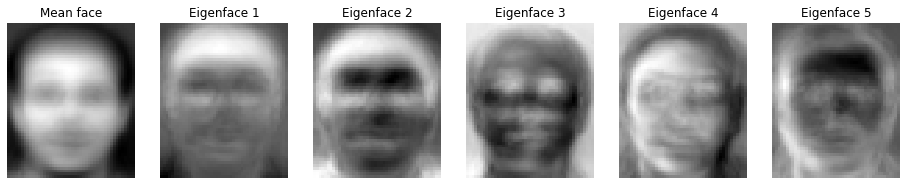

In [11]:
pca =PCA()
pca.fit(X_train.reshape(len(y_train),-1))

plt.figure(figsize=(16,12))
plt.subplot(1,6,1)
plt.axis('off')
plt.title('Mean face')
plt.imshow(pca.mean_.reshape(X_train[0].shape),cmap='gray')

for i in range(5):
    plt.subplot(1,6,i+2)
    plt.axis('off')
    plt.title('Eigenface {}'.format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape),cmap='gray')

plt.show()

In [10]:
pca.components_.shape #可以調出第 i個的pixel值

(360, 2576)

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

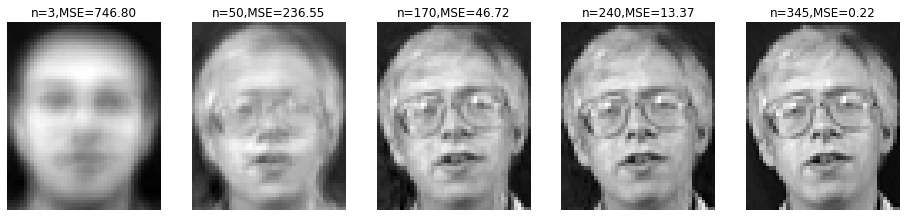

In [13]:
img = cv2.imread('data/2_1.png',cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3,50,170,240,345]
for i,n in enumerate(n_components):
    face = np.zeros(img.shape)
    for j in range(n):
        face = face+a[0][j]*pca.components_[j]
    face = face+pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.title('n={},MSE={:.2f}'.format(n,MSE))
    plt.imshow(face.reshape(X_train[0].shape),cmap='gray')
    


## 4. cross-validation results

In [17]:
reduced_X_train = pca.transform(X_train.reshape(len(y_train),-1))
K = [1,3,5]
N = [3,50,170]
random = np.random.permutation(len(y_train))
reduced_X_train = reduced_X_train[random]
y_train_random = y_train[random]
for k in K:
    print('k={}'.format(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    for n in N :
        print('    n={}, '.format(n),end = '')
        score = cross_val_score(knn,reduced_X_train[:,:n],y_train_random,cv=3)
        print('score={:.4f}'.format(score.mean()))

k=1
    n=3, score=0.7028
    n=50, score=0.9722
    n=170, score=0.9694
k=3
    n=3, score=0.6583
    n=50, score=0.9167
    n=170, score=0.9139
k=5
    n=3, score=0.6028
    n=50, score=0.8611
    n=170, score=0.8444


## 5. recognition rate of the testing set

In [20]:
k=1
n=50
reduced_X_test = pca.transform(X_test.reshape(len(y_test),-1))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:,:n],y_train_random)
print('accuracy = {}'.format(knn.score(reduced_X_test[:,:n],y_test)))

accuracy = 0.925
